In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import seaborn as sns
sns.set(style="darkgrid")

In [3]:
data= pd.read_csv("/home/mayur/Desktop/IEOR/2nd SEM/GNR652/Assignments/assignment-rw/FlightDelays.csv")
data.head()

,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_DATE,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,TAIL_NUM,Flight Status
0,1455,OH,1455,JFK,184,01/01/2004,5935,BWI,0,4,1,N940CA,ontime
1,1640,DH,1640,JFK,213,01/01/2004,6155,DCA,0,4,1,N405FJ,ontime
2,1245,DH,1245,LGA,229,01/01/2004,7208,IAD,0,4,1,N695BR,ontime
3,1715,DH,1709,LGA,229,01/01/2004,7215,IAD,0,4,1,N662BR,ontime
4,1039,DH,1035,LGA,229,01/01/2004,7792,IAD,0,4,1,N698BR,ontime


In [6]:
data.shape

(2201, 13)

# Data_Visualization

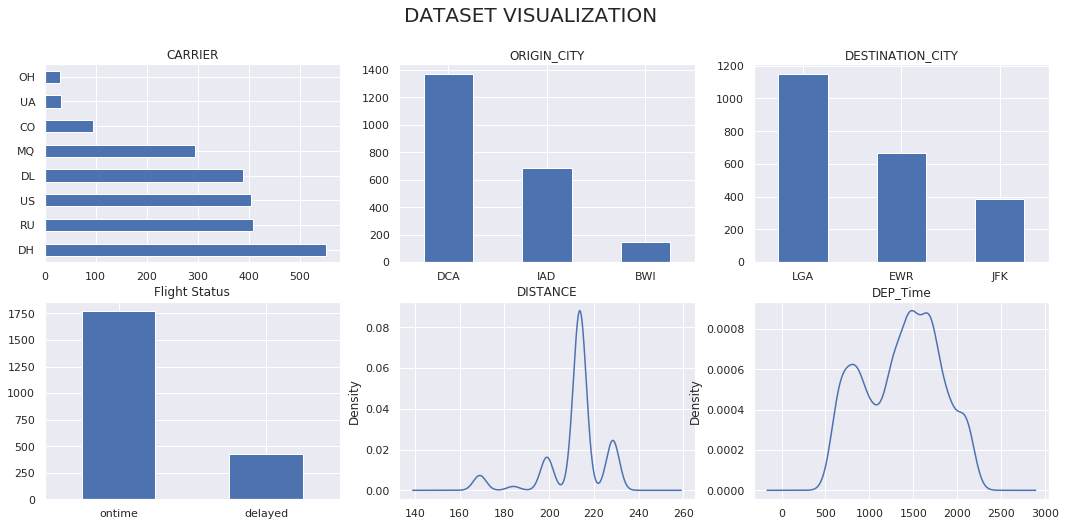

In [3]:
fig, ax_array = plt.subplots(2,3, figsize=(18,8))
(ax1, ax2, ax3), (ax4, ax5, ax6) = ax_array
fig.suptitle('DATASET VISUALIZATION', size= 20)

car= data['CARRIER'].value_counts()
car.plot(kind='barh', ax=ax1, title='CARRIER')

oc= data['ORIGIN'].value_counts()
oc.plot(kind='bar', ax=ax2, rot=0, title='ORIGIN_CITY')

dc= data['DEST'].value_counts()
dc.plot(kind='bar', ax=ax3, rot=0, title='DESTINATION_CITY')

status= data['Flight Status'].value_counts()
status.plot(kind='bar', ax=ax4, rot=0, title='Flight Status')

data['DISTANCE'].plot(kind='kde', ax=ax5, title='DISTANCE')
data['CRS_DEP_TIME'].plot(kind='kde', ax=ax6, title='DEP_Time')

Number of Ontime_Flights:  1773
Number of Delayed_Flights :  428


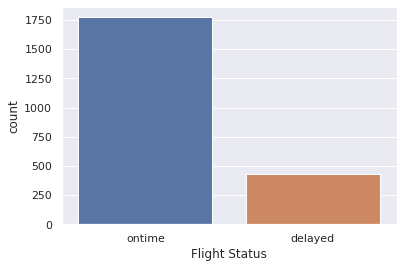

In [4]:
#printing and visualizing the flight status
ax = sns.countplot(x="Flight Status", data=data)
O,D = data.loc[: ,"Flight Status"].value_counts()
print('Number of Ontime_Flights: ',O)
print('Number of Delayed_Flights : ',D)

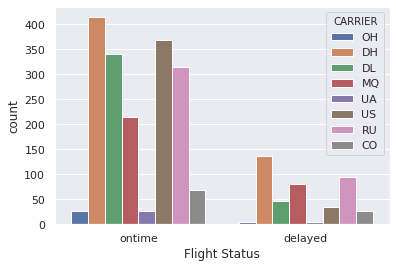

In [5]:
#checking different carriers status
ax = sns.countplot(x="Flight Status", hue="CARRIER", data=data)

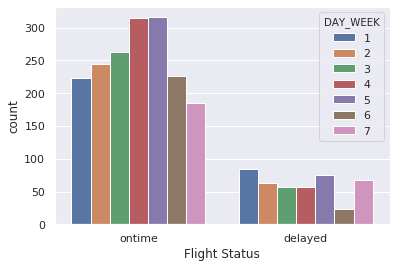

In [6]:
#checking different day of week status
ax = sns.countplot(x="Flight Status", hue="DAY_WEEK", data=data)

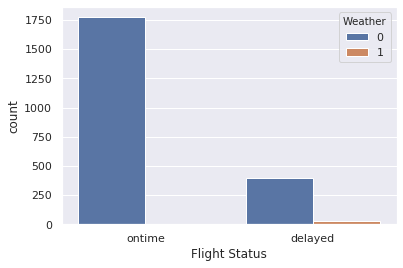

In [7]:
#checking different weather status
ax = sns.countplot(x="Flight Status", hue="Weather", data=data)

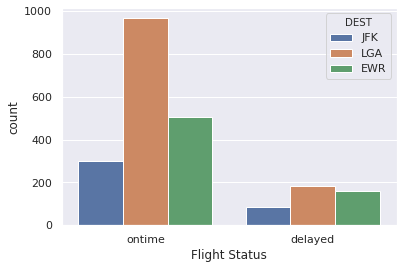

In [8]:
#checking different weather status
ax = sns.countplot(x="Flight Status", hue="DEST", data=data)

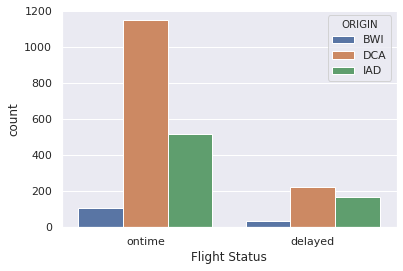

In [9]:
#checking different weather status
ax = sns.countplot(x="Flight Status", hue="ORIGIN", data=data)

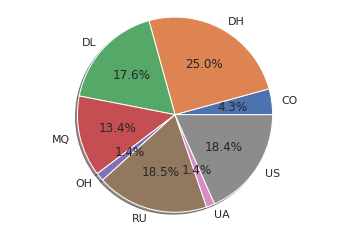

In [10]:
#some more information about carriers using pie chart
labels = data['CARRIER'].astype('category').cat.categories.tolist()
counts = data['CARRIER'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

In [11]:
#feaguring out carrier info
# function that extract statistical parameters from a grouby objet:
def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean()}
#_______________________________________________________________
# Creation of a dataframe with statitical infos on each airline:
global_stats = data['DISTANCE'].groupby(data['CARRIER']).apply(get_stats).unstack()
global_stats = global_stats.sort_values('count')
global_stats

,min,max,count,mean
CARRIER,,,,
OH,184.0,184.0,30.0,184.000000
UA,229.0,229.0,31.0,229.000000
CO,199.0,199.0,94.0,199.000000
MQ,213.0,214.0,295.0,213.691525
DL,213.0,214.0,388.0,213.920103
US,214.0,214.0,404.0,214.000000
RU,169.0,213.0,408.0,195.039216
DH,213.0,229.0,551.0,223.107078


In [12]:
# to check whether there are missing values in dataset or not
missing_data = data.isnull().sum(axis=0).reset_index()
missing_data.columns = ['variable', 'missing values']
missing_data['filling factor (%)']=(data.shape[0]-missing_data['missing values'])/data.shape[0]*100
missing_data.sort_values('filling factor (%)').reset_index(drop = True)

,variable,missing values,filling factor (%)
0,CRS_DEP_TIME,0,100.0
1,CARRIER,0,100.0
2,DEP_TIME,0,100.0
3,DEST,0,100.0
4,DISTANCE,0,100.0
5,FL_DATE,0,100.0
6,FL_NUM,0,100.0
7,ORIGIN,0,100.0
8,Weather,0,100.0
9,DAY_WEEK,0,100.0


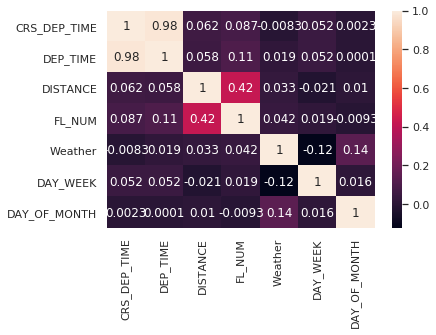

In [13]:
#finding correlation between each of the attribute
corr_matrix = data.corr().round(4)
sns.heatmap(data= corr_matrix, annot= True)

In [14]:
#removing the FL_NUM, TAIL_NUM and Day_of_Month coloumns 
data_modi = data.drop(['FL_NUM', 'TAIL_NUM', 'FL_DATE'], axis=1)
data_modi.head()

,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,Flight Status
0,1455,OH,1455,JFK,184,BWI,0,4,1,ontime
1,1640,DH,1640,JFK,213,DCA,0,4,1,ontime
2,1245,DH,1245,LGA,229,IAD,0,4,1,ontime
3,1715,DH,1709,LGA,229,IAD,0,4,1,ontime
4,1039,DH,1035,LGA,229,IAD,0,4,1,ontime


# Data_Preprocessing

In [15]:
# label encoding the Output feature (converting 'ontime'=1 and 'delay'=0)
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder() 
  
data_modi['Flight Status']= le.fit_transform(data_modi['Flight Status'])
data_modi.head()

,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,Flight Status
0,1455,OH,1455,JFK,184,BWI,0,4,1,1
1,1640,DH,1640,JFK,213,DCA,0,4,1,1
2,1245,DH,1245,LGA,229,IAD,0,4,1,1
3,1715,DH,1709,LGA,229,IAD,0,4,1,1
4,1039,DH,1035,LGA,229,IAD,0,4,1,1


In [16]:
#getting dummies
data_dumm=pd.get_dummies(data_modi)
data_dumm.head()

,CRS_DEP_TIME,DEP_TIME,DISTANCE,Weather,DAY_WEEK,DAY_OF_MONTH,Flight Status,CARRIER_CO,CARRIER_DH,CARRIER_DL,...,CARRIER_OH,CARRIER_RU,CARRIER_UA,CARRIER_US,DEST_EWR,DEST_JFK,DEST_LGA,ORIGIN_BWI,ORIGIN_DCA,ORIGIN_IAD
0,1455,1455,184,0,4,1,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0
1,1640,1640,213,0,4,1,1,0,1,0,...,0,0,0,0,0,1,0,0,1,0
2,1245,1245,229,0,4,1,1,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,1715,1709,229,0,4,1,1,0,1,0,...,0,0,0,0,0,0,1,0,0,1
4,1039,1035,229,0,4,1,1,0,1,0,...,0,0,0,0,0,0,1,0,0,1


In [17]:
#spliting dataset into train and test
from sklearn.model_selection import train_test_split
y=data_dumm['Flight Status']                                  #stores the output values(Flight_Status) in y
X = data_dumm.loc[:, data_dumm.columns != 'Flight Status']         #stores the other values in x
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

matrix_ytrain = np.array(y_train).reshape(1,1320)   # this will be my y_train  


In [18]:
#data pre-processing using sklearn
from sklearn import preprocessing
X_train_scale = preprocessing.scale(X_train)
X_test_scale = preprocessing.scale(X_test)

/home/mayur/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by the scale function.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/mayur/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by the scale function.
  after removing the cwd from sys.path.


# logistic regression from scratch

In [19]:
# defining logistic function
weight = np.zeros([20,1], dtype = int)
def sigmoid(X, weight):
    z = np.dot(X, weight)
    return 1 / (1 + np.exp(-z))
#sigmoid(X_train, weight)
h= sigmoid(X_train_scale, weight)

In [20]:
#loss minimizing with the help of gradient descent method(to find the best value for weights)
def loss(h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
h= sigmoid(X_train_scale, weight)
loss_calc= loss(h,matrix_ytrain)
print(loss_calc)

0.6931471805599465


In [21]:
#greadient descent and updating weights
def gradient_descent(X, h, y):
    return np.dot(X.T, (h - y.T)) / y.shape[0]
gd= gradient_descent(X_train_scale, h, matrix_ytrain)

In [22]:
def update_weight_loss(weight, learning_rate, gradient):
    new_weight= weight - learning_rate * gradient
    return new_weight

new_weight = update_weight_loss(weight,0.1,gd)

In [23]:
#accuracy of the model on training dataset
f = pd.DataFrame(np.around(h, decimals=6)).join(y)
f['pred'] = f[0].apply(lambda x : 0 if x < 0.5 else 1)
print("Accuracy (Loss minimization):")
f.loc[f['pred']==f['Flight Status']].shape[0] / f.shape[0]

Accuracy (Loss minimization):


0.8090909090909091

# Logistic regression with sklearn

/home/mayur/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy of Logistic regression classifier on test set: 0.87
<function confusion_matrix at 0x7f63b91de4d0>
              precision    recall  f1-score   support

           0       1.00      0.29      0.45       163
           1       0.86      1.00      0.93       718

   micro avg       0.87      0.87      0.87       881
   macro avg       0.93      0.64      0.69       881
weighted avg       0.89      0.87      0.84       881



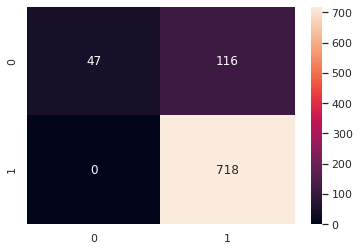

In [24]:
# fitting the logistic regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
#fitting dataset
logreg.fit(X_train_scale,y_train)
y_pred = logreg.predict(X_test_scale)
print('Accuracy of Logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test_scale, y_test)))
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt="d")
print(confusion_matrix)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [25]:
from sklearn.metrics import classification_report
logreg.classes_
logreg.intercept_
logreg.coef_

array([[ 4.2742655 , -4.70931008,  0.02129813, -0.76449997,  0.08938631,
        -0.16615835, -0.18373648,  0.01734126,  0.14790424, -0.21716511,
         0.1305248 , -0.18994231,  0.02383552,  0.26620417,  0.0396631 ,
         0.05142842, -0.07651556, -0.00573257,  0.08592897, -0.08635132]])

Area under the ROC curve: 0.3558282208588957


Text(0.5, 1.0, 'Receiver operating characteristic (ROC)')

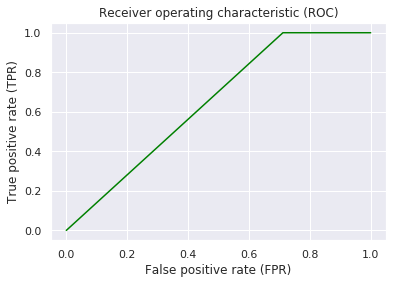

In [26]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = np.trapz(fpr,tpr)
print('Area under the ROC curve: ' + str(auc))

fig = plt.figure(1)
plt.plot(fpr,tpr,color='green')
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')
plt.title('Receiver operating characteristic (ROC)')

In [27]:
#measures of model performance on test set
#1. Root Mean Square Error
from sklearn.metrics import mean_squared_error
import math
mse= math.sqrt(mean_squared_error(y_test, y_pred))
print('Root mean square error', mse)
#2. R_Square Value
from sklearn.metrics import r2_score
r_square = r2_score(y_test, y_pred)
print('r_squared value', r_square)

Root mean square error 0.3628616243918605
r_squared value 0.1267836697028215


# Performing variable selection using tree based feature selection

/home/mayur/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Feature ranking:
1. feature 1 (0.333728)
2. feature 5 (0.212644)
3. feature 0 (0.154851)
4. feature 4 (0.122785)
5. feature 3 (0.039632)
6. feature 2 (0.022731)
7. feature 9 (0.015462)
8. feature 13 (0.015078)
9. feature 8 (0.014058)
10. feature 18 (0.010097)
11. feature 16 (0.009470)
12. feature 7 (0.008218)
13. feature 14 (0.008191)
14. feature 19 (0.007817)
15. feature 6 (0.006021)
16. feature 11 (0.005965)
17. feature 15 (0.005961)
18. feature 17 (0.005385)
19. feature 10 (0.001754)
20. feature 12 (0.000151)


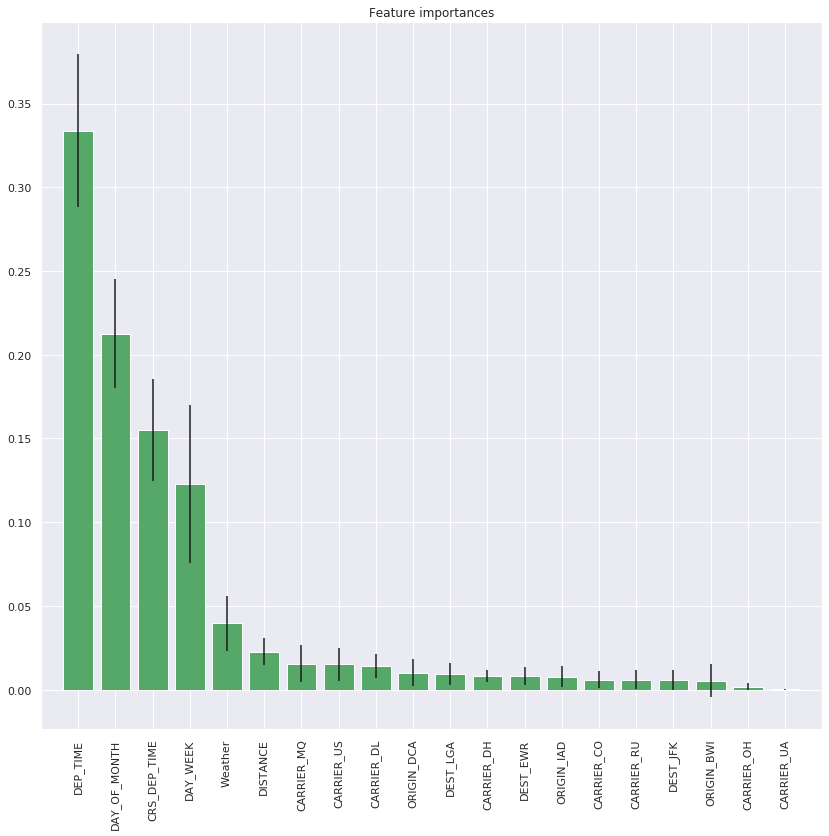

In [28]:
#Tree based feature selection
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier()      
clr_rf = clf_rf.fit(X_train,y_train)
importances = clr_rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices],rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [29]:
data_dumm.columns

Index(['CRS_DEP_TIME', 'DEP_TIME', 'DISTANCE', 'Weather', 'DAY_WEEK',
       'DAY_OF_MONTH', 'Flight Status', 'CARRIER_CO', 'CARRIER_DH',
       'CARRIER_DL', 'CARRIER_MQ', 'CARRIER_OH', 'CARRIER_RU', 'CARRIER_UA',
       'CARRIER_US', 'DEST_EWR', 'DEST_JFK', 'DEST_LGA', 'ORIGIN_BWI',
       'ORIGIN_DCA', 'ORIGIN_IAD'],
      dtype='object')

In [30]:
#dropping those features which are having less importance
data_extracted = data_dumm.drop(['CARRIER_US','CARRIER_CO','DEST_EWR','CARRIER_DH','DEST_LGA','DEST_JFK','ORIGIN_DCA',
                                'ORIGIN_BWI','ORIGIN_IAD','CARRIER_RU','CARRIER_OH','CARRIER_UA'], axis=1)
data_extracted.head()

,CRS_DEP_TIME,DEP_TIME,DISTANCE,Weather,DAY_WEEK,DAY_OF_MONTH,Flight Status,CARRIER_DL,CARRIER_MQ
0,1455,1455,184,0,4,1,1,0,0
1,1640,1640,213,0,4,1,1,0,0
2,1245,1245,229,0,4,1,1,0,0
3,1715,1709,229,0,4,1,1,0,0
4,1039,1035,229,0,4,1,1,0,0


Analysis fitting new model

In [31]:
#spliting dataset into train and test
from sklearn.model_selection import train_test_split
y=data_extracted['Flight Status']                                  #stores the output values(Flight_Status) in y
X = data_extracted.loc[:, data_extracted.columns != 'Flight Status']         #stores the other values in x
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [32]:
#data pre-processing using sklearn
from sklearn import preprocessing
X_train_scale1 = preprocessing.scale(X_train)
X_test_scale1 = preprocessing.scale(X_test)

/home/mayur/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by the scale function.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/mayur/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by the scale function.
  after removing the cwd from sys.path.


/home/mayur/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy of Logistic regression classifier on test set: 0.87
<function confusion_matrix at 0x7f63b91de4d0>
              precision    recall  f1-score   support

           0       1.00      0.28      0.44       163
           1       0.86      1.00      0.92       718

   micro avg       0.87      0.87      0.87       881
   macro avg       0.93      0.64      0.68       881
weighted avg       0.89      0.87      0.84       881



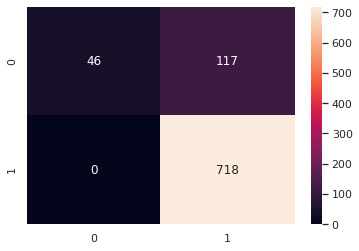

In [33]:
# fitting the logistic regression model on dataset
from sklearn.linear_model import LogisticRegression
logreg_modi = LogisticRegression()
#fitting dataset
logreg_modi.fit(X_train_scale1,y_train)
y_pred = logreg_modi.predict(X_test_scale1)
print('Accuracy of Logistic regression classifier on test set: {:.2f}'.format(logreg_modi.score(X_test_scale1, y_test)))
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt="d")
print(confusion_matrix)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [34]:
logreg_modi.intercept_
logreg_modi.coef_

array([[ 4.58058436, -5.01615761,  0.07697328, -0.77150093,  0.08834864,
        -0.15181712,  0.18530203, -0.16382605]])

In [35]:
#measures of model performance on test set
#1) Root Mean Square Error
from sklearn.metrics import mean_squared_error
import math
mse= math.sqrt(mean_squared_error(y_test, y_pred))
print('Root mean square error', mse)
#2) R_Square Value
from sklearn.metrics import r2_score
r_square = r2_score(y_test, y_pred)
print('r_squared value', r_square)

Root mean square error 0.3644223267530344
r_squared value 0.11925594271750095


finding the idal weather conditions

In [36]:
#extrading the data with Flight_status = ontime
data_ontime = data[data['Flight Status'].str.contains("ontime")]
data_ontime.head()

,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_DATE,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,TAIL_NUM,Flight Status
0,1455,OH,1455,JFK,184,01/01/2004,5935,BWI,0,4,1,N940CA,ontime
1,1640,DH,1640,JFK,213,01/01/2004,6155,DCA,0,4,1,N405FJ,ontime
2,1245,DH,1245,LGA,229,01/01/2004,7208,IAD,0,4,1,N695BR,ontime
3,1715,DH,1709,LGA,229,01/01/2004,7215,IAD,0,4,1,N662BR,ontime
4,1039,DH,1035,LGA,229,01/01/2004,7792,IAD,0,4,1,N698BR,ontime


In [37]:
#extracting data with flight_status =ontime and origin =DCA
data_DCA = data_ontime[data_ontime['ORIGIN'].str.contains("DCA")]
data_DCA.head()

,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_DATE,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,TAIL_NUM,Flight Status
1,1640,DH,1640,JFK,213,01/01/2004,6155,DCA,0,4,1,N405FJ,ontime
11,1455,DL,1458,JFK,213,01/01/2004,746,DCA,0,4,1,N918DE,ontime
12,930,DL,932,LGA,214,01/01/2004,1746,DCA,0,4,1,N242DL,ontime
13,1230,DL,1228,LGA,214,01/01/2004,1752,DCA,0,4,1,N241DL,ontime
14,1430,DL,1429,LGA,214,01/01/2004,1756,DCA,0,4,1,N242DL,ontime


In [38]:
#extracting data with flight_status =ontime and origin =DCA and destination= EWR
data_EWR = data_DCA[data_DCA['DEST'].str.contains("EWR")]
data_EWR.head()

,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_DATE,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,TAIL_NUM,Flight Status
36,1300,CO,1256,EWR,199,01/01/2004,808,DCA,0,4,1,N18611,ontime
37,1730,CO,1726,EWR,199,01/01/2004,814,DCA,0,4,1,N19357,ontime
44,1525,RU,1521,EWR,199,01/01/2004,2261,DCA,0,4,1,N12564,ontime
45,1900,RU,1855,EWR,199,01/01/2004,2336,DCA,0,4,1,N21537,ontime
46,1400,RU,1357,EWR,199,01/01/2004,2216,DCA,0,4,1,N15983,ontime


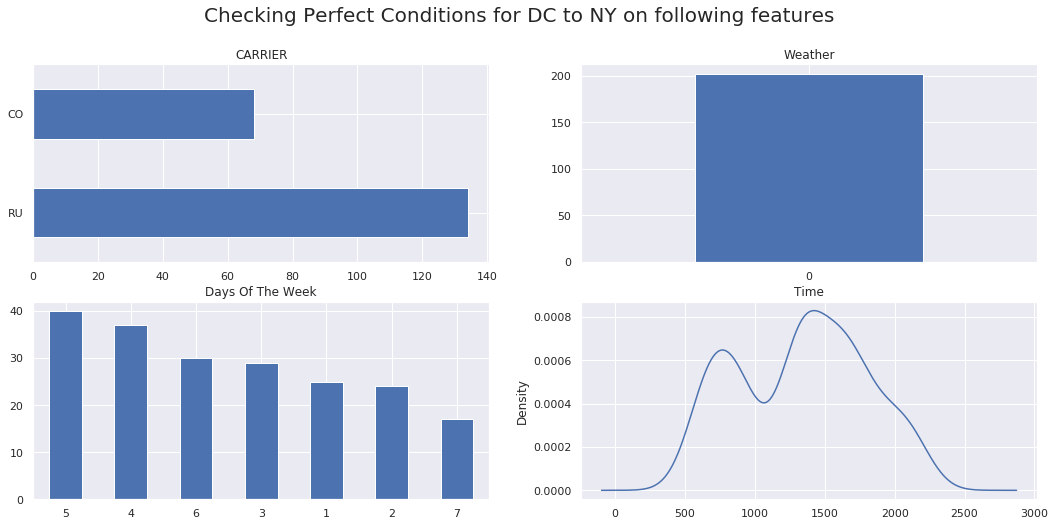

In [39]:
# plotting count_plot to check for what carriers, weather, time and day of the week we get the answer.
fig, ax_array = plt.subplots(2,2, figsize=(18,8))
(ax1, ax2), (ax3, ax4) = ax_array
fig.suptitle('Checking Perfect Conditions for DC to NY on following features', size= 20)

car= data_EWR['CARRIER'].value_counts()
car.plot(kind='barh', ax=ax1, title='CARRIER')

oc= data_EWR['Weather'].value_counts()
oc.plot(kind='bar', ax=ax2, rot=0, title='Weather')

dc= data_EWR['DAY_WEEK'].value_counts()
dc.plot(kind='bar', ax=ax3, rot=0, title='Days Of The Week')

data_EWR['CRS_DEP_TIME'].plot(kind='kde', ax=ax4, title='Time')

#ax = sns.countplot(x="Flight Status", hue="DAY_WEEK", data=data)
